<a href="https://colab.research.google.com/github/ZikrullaRaxmatov/Zako_AI_Lessons/blob/main/MachineLearning_M2_1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

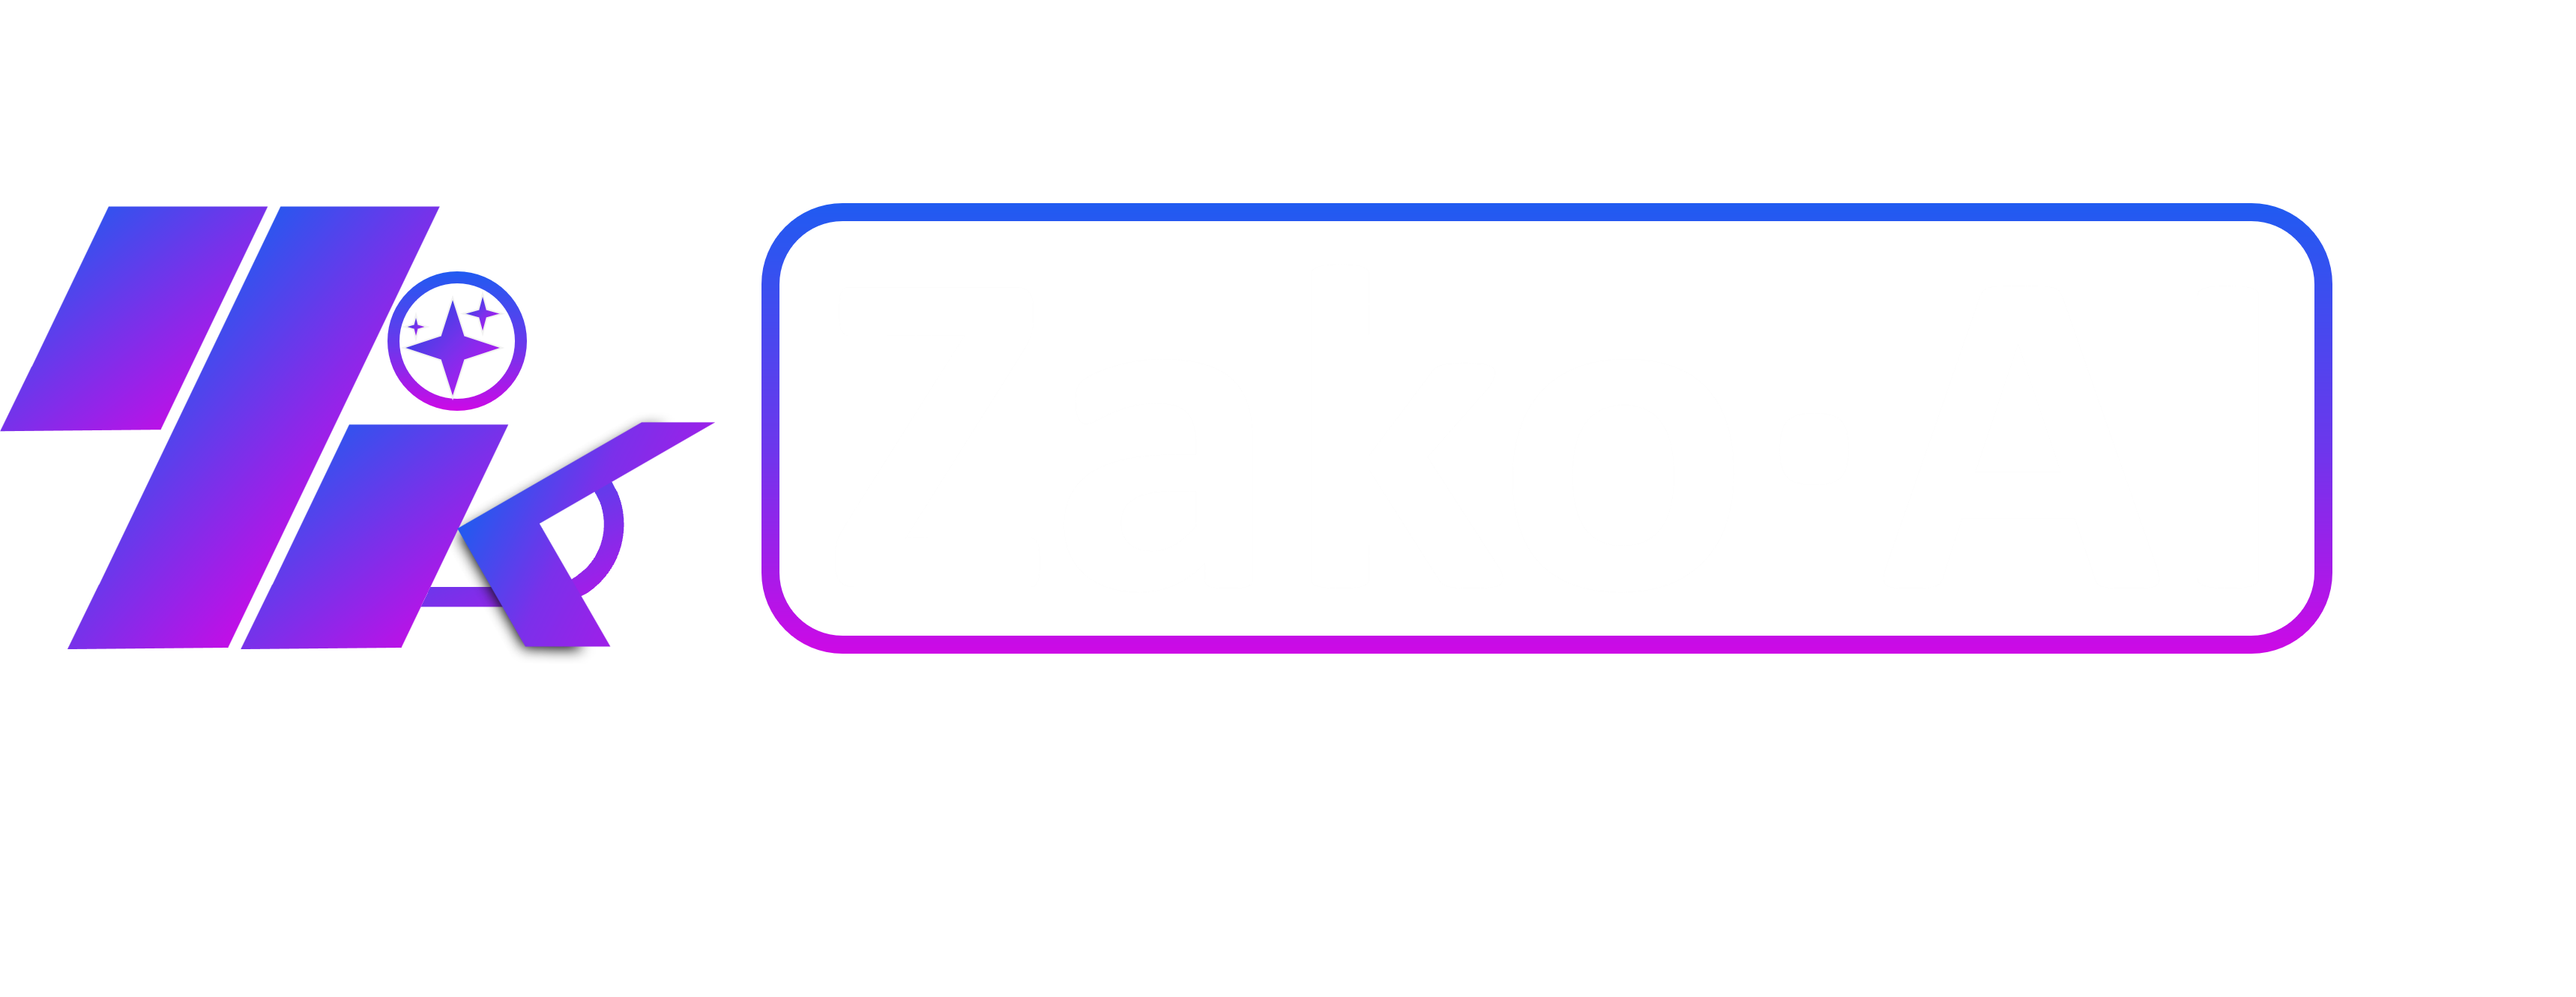

# MachineLearning M2-1
# KNN (K: Nearest Neighbour)

### Topiklar: `Classification (Euclidean)`, `Regression`

## Datasetni yuklab olish

In [ ]:
# Importing libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

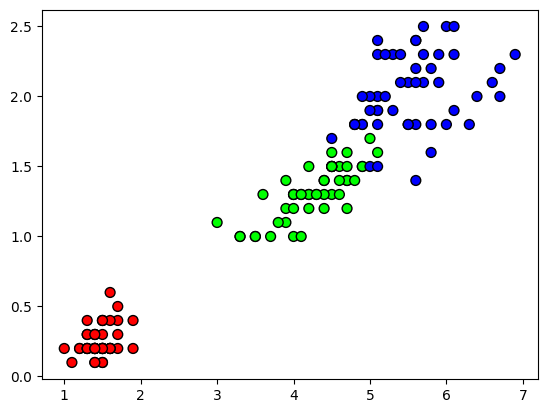

In [ ]:
# Splitting dataset
iris = datasets.load_iris()

X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

plt.figure()
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=cmap, edgecolors='k', s=50);

# KNN Classicaton
## Euclidean formulasidan foydalanib `KNN_classification` dasturini 0 dan yozing.

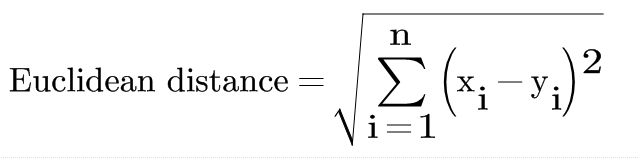

In [ ]:
# KNN_Classification
from collections import Counter

def euclidean_distance(x1, x2):
  distance = np.sqrt(np.sum((x1 - x2)**2))
  return distance

class KNN_Classification:
  def __init__(self, k = 3):
    self.k = k

  def fit(self, X, Y):
    self.X_train = X
    self.Y_train = Y

  def predict(self, X):
    predictions = [ self._predict(x) for x in X]
    return predictions

  def _predict(self, x):
    # Measure distance
    distances = [ euclidean_distance(x, x_train) for x_train in X_train]

    # K nearest neighbor
    k_inds = np.argsort(distances)[:self.k]
    k_labels = [self.Y_train[i] for i in k_inds]

    # Top Probability
    most_freq = Counter(k_labels).most_common()
    return most_freq[0][0]

In [ ]:
clf = KNN_Classification(k = 5)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
acc = np.sum(preds == y_test)/len(y_test)
acc

0.9736842105263158

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_skit = KNeighborsClassifier(n_neighbors = 5)
clf_skit.fit(X_train, y_train)
predictions = clf_skit.predict(X_test)
accuracy = np.sum(predictions == y_test)/len(y_test)
accuracy

0.9736842105263158

# KNN Regression

## `KNN_Regression` dasturini 0 dan yozing

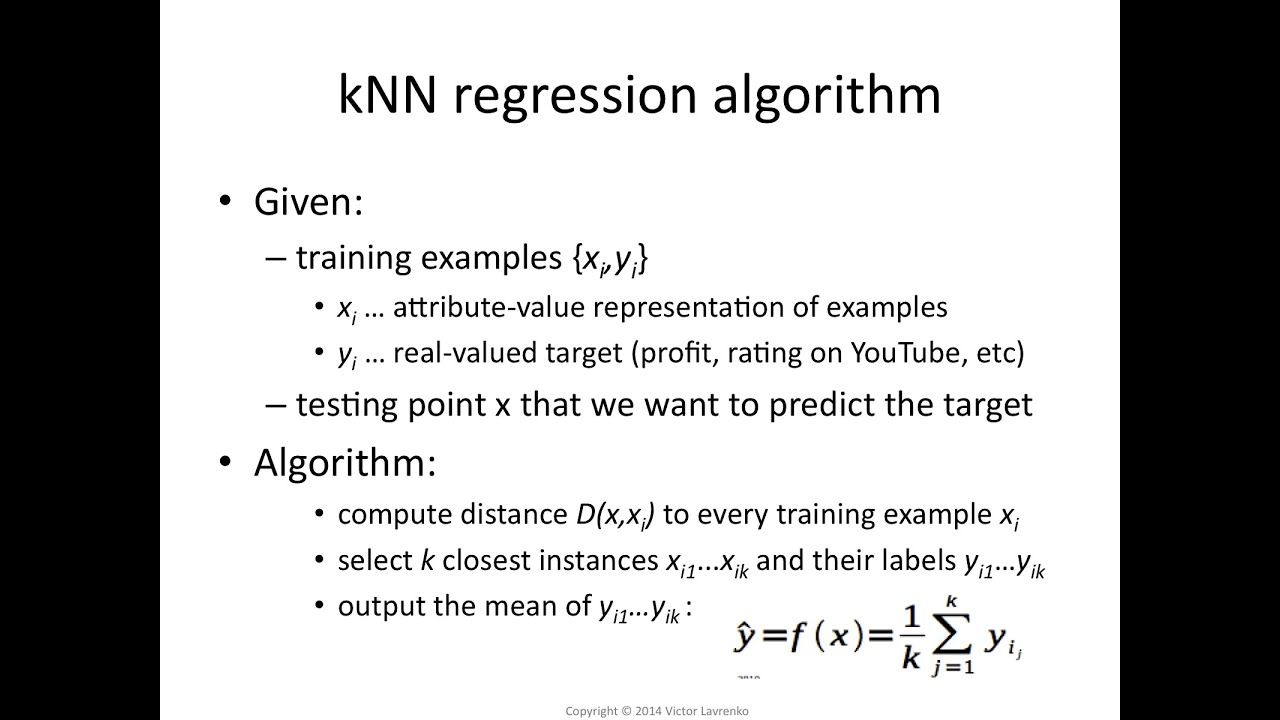


In [ ]:
iris2 = datasets.load_iris(as_frame=True)
data = iris2.frame
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Splitting
X2 = data.drop(['sepal length (cm)', 'target'], axis=1)
Y2 = data['sepal length (cm)']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.25, random_state=10)

In [ ]:
# KNN_Regression

def euclidean_dist(x1, x2):
  distance = np.sqrt(np.sum((x1 - x2)**2))
  return distance

class KNN_Regression:
  def __init__(self, k = 3):
    self.k = k

  def fit(self, X, Y):
    self.X_train = X
    self.Y_train = Y

  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return predictions

  def _predict(self, x):
    # Measure distance
    distances = [ euclidean_dist(x, x_train) for x_train in self.X_train]

    # K nearest neighbor
    k_indexes = np.argsort(distances)[:self.k]
    k_labels = [self.Y_train[i] for i in k_indexes]

    # Mean of neighbor
    k_mean = np.sum(k_labels)/len(k_labels)
    return k_mean

In [ ]:
reg = KNN_Regression(k = 3)
reg.fit(X_train2, y_train2)
preds2 = reg.predict(X_test2)
preds2

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regresson = KNeighborsRegressor(n_neighbors = 5)
regresson.fit(X_train2, y_train2)
predictions2 = regresson.predict(X_test2)
predictions2

array([5.64, 6.2 , 5.1 , 6.16, 4.86, 5.38, 6.22, 5.7 , 4.96, 6.32, 6.22,
       5.88, 5.68, 4.7 , 5.3 , 6.56, 6.62, 4.54, 5.24, 4.66, 6.96, 6.56,
       6.14, 5.  , 6.2 , 4.74, 6.  , 5.9 , 6.2 , 7.16, 6.26, 6.  , 6.76,
       6.42, 5.88, 4.8 , 6.54, 6.6 ])